In [1]:
import pickle
with open('mnist_small_py2_3.pkl', 'rb') as f:
    train_set = pickle.load(f)

In [2]:
data =train_set['X']
label = train_set['Y']

In [3]:
print(data.shape)
print(label.shape)

(10000, 784)
(10000, 1)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
train_img, test_img, train_lbl, test_lbl = train_test_split(
 data, label, test_size=1/7.0, random_state=0)

In [6]:
train_img.shape

(8571, 784)

In [7]:
test_img.shape

(1429, 784)

In [8]:
train_lbl.shape

(8571, 1)

In [9]:
test_lbl.shape

(1429, 1)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('True Label %i\n' % label)

In [31]:
logisticRegr = LogisticRegression(solver = 'lbfgs',penalty='l2')

In [32]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\Himanshu\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False)

In [33]:
predictions = logisticRegr.predict(test_img)

In [34]:
predictions.shape

(1429,)

In [35]:
test_lbl.shape

(1429, 1)

In [36]:
accuracy = logisticRegr.score(test_img, test_lbl)

In [37]:
accuracy

0.8719384184744576

In [38]:
import seaborn as sns
from sklearn import metrics

In [39]:
confusion = metrics.confusion_matrix(test_lbl, predictions)


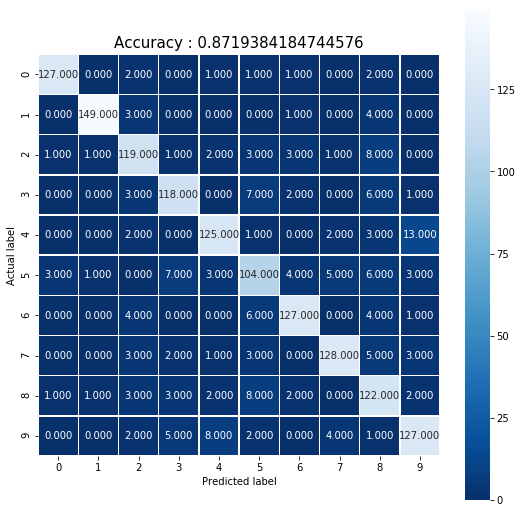

In [40]:
plt.figure(figsize=(9,9))
sns.heatmap(confusion, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy : {0}'.format(accuracy)
plt.title(all_sample_title, size = 15);

In [69]:
index = 0
misclassifiedIndexes = []
for i in range(len(test_lbl)):
    if test_lbl[i,0] != predictions[i] :
        misclassifiedIndexes.append(i)
        index +=1

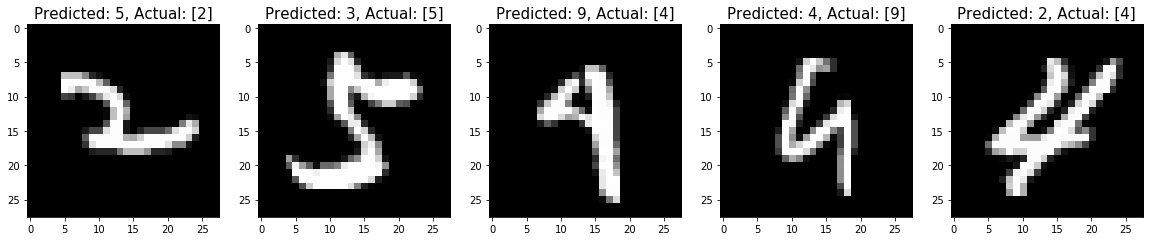

In [71]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)